---------
- # 요약
    - 11장 복습할것
---------

# 9. CNN
- 3-4-1 참조

## 종류
- AlexNet
- VGGNet
    - $3*3$ 컨볼루션 레이어 세개는 $7*7$ 컨볼루션 레이어 하나만큼 효과적임
- GoogleNet
    - Inception Network
        - 여러 크기의 필터를 병렬적으로 연결함
        - same 필터 사용해서 동일한 크기의 필터출력 만든후 병렬적으로 연결
    - bottleneck layer
        - 적은 갯수의 $1*1$ 필터연산을 해 채널수를 줄임으로써 파라미터 줄임
- ResNet
    - 잔차 연결
        - 레이어 몇단계를 건너 뛰어 입력값을 직접 연결함
    - FractalNet
    - DenseNet
        - 입력값을 모든 다른 레이어와 연결함
        - 기울기 소실 오히려 촉진시킴
    - SqueezeNet
        - $3*3$ conv 레이어를 $1*1$ 레이어로 대체한 후 이 레이어를 $1*1$, $3*3$ 컨볼루션을 병렬연산해 합쳐 사용함
        - 매우 적은 파라미터
        

# 10. RNN


## RNN
- 3-5-1 , 4_11 참조
- Image Captioning
    - CNN-RNN
        - CNN 으로 이미지 특징 추출-> 이후 RNN 으로 입력받아 텍스트 생성함
        - CNN 출력을 은닉층 첫 입력으로 넣고, x_0 에 \<SOS\> 사용

## LSTM
- 3-5-1 참조
- 경계를 선형적으로 바꾸려는 시도가 있었으나 결과적으론 큰 차이가 없었다함

# 11. Segmentation, Localization, Detection


## 의미적 분할
- 객체의 경계선을 클래스에 따라 분리하는 작업임
- 다운샘플링 통해 차원 축소후 다시 동일하게 업샘플링하여 확장함
    - 전치 합성곱
    

## Classification+Localization
- 입력을 분류하고, 객체가 존재하는 바운딩 박스를 정의하는 문제임
- 바운딩 박스 정의
    - 슬라이딩 윈도우
    - R-CNN
        1. 영역제안
            - 선택적 탐색 알고리즘으로 객체가 있을만한 영역 후보(Region of Interest) 제안함
        2. 특징 추출
            - 각 영역 제안을 CNN 입력 크기로 변형해 통과시켜 특징벡터 추출함
        3. SVM 분류
            - 출력된 벡터를 svm 분류를 통해 레이블, 신뢰도 점수를 얻음
        4. 경계 상자 회귀
            - 초기 영역 제안을 더 정확하게 맞도록 조정하는 과정임
        - 연산이 무겁고 느림
    - Fast R-CNN
        - 각 영역 제안 별 특징벡터 추출하는 것이 아닌 이미지 전체를 convtNet 에 통과시켜 특징 추출함
        - 추출된 특징벡터에서 ROI 해당되는 부분 추출함
        - ROI는 풀링을 통해 동일한 고정된 크기로 변환함
        - ROI 와 특징벡터를 FC 레이어에 통과시킨후 소프트맥스 분류기로 분류함
        - 이후 임계값 넘는 ROI 선택후 위치조정, 중복검출 후 결과출력
    - Faster R-CNN
        - CNN 특징 맵에서 직접 ROI 제안함
        - 내트워크 내부에서 ROI 생성
    - YOLO
    - SSD

## 객체 탐지
- 3-4-2 참조
- 다수의 객체를 탐지하고, 바운딩 박스를 정의하는 문제임
- Mask R-CNN

## Instance Segmentation
- 이미지 내의 각 객체를 픽셀 단위로 구분, 분류하는 작업임
- 경계 상자를 생성하고, 이 경계 상자 내에서 세밀한 픽셀을 구분하는 two-stage 방식,
- 픽셀 단위의 특징을 연산하고, 이를 그룹화해서 인스턴스 만드는 one-stage 방식이 있음

- Mask R-CNN
    - 과정
        1. 전체 이미지를 CNN 등 백본 네트워크에 통과시켜 특징 벡터를 구한다
        2. RoI 를 구한다. 구한 RoI 를 RoI Align 을 이용해 일정한 형태의 블럭으로 만든다
            - RoI Align
                - 풀링 대신 사용하는 이유
                    - 풀링은 맵 크기에 맞게 스케일링 하는 과정에서 좌표 오차가 발생하며, 이로 인해 정확도 저하 발생함
                - 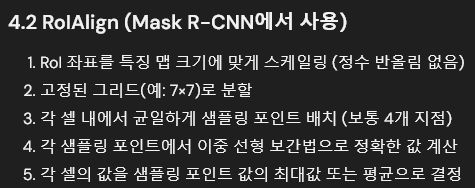
        3. 해당 영역을 입력값으로 받아 Conv 레이어 통과시켜 클래스 분류, 바운딩 박스 정의, 마스크 예측을 병렬적으로 연산함
    - 해당 모델을 적절하게 수정하여 실시간 포즈 예측에도 사용가능함

# 12. 시각화와 이해


## ConvNet 내부 연산 과정
- 저단계의 Conv 레이어에선 단순한 특징들을 학습함
    - 간단한 선, 엣지, 색상 등등
- 고 단계의 레이어에선 점점 복잡한 형태의 특징을 학습하게 됨.
- 마지막 FC 레이어는 특징 공간에서 비슷한 특징를 가지고 있음
    - 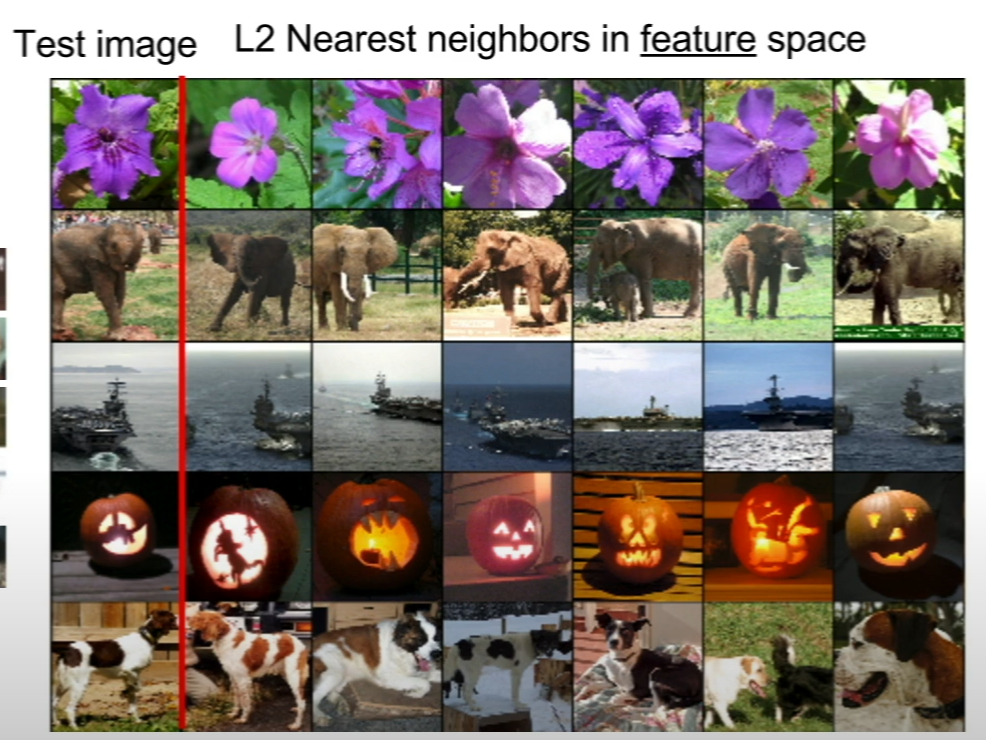

## 시각화
- t-SNE
    - 고차원 데이터를 저차원으로 시각화하기 위한 기법임
    - 과정
        1. 각각의 데이터에 대해 다른 데이터와의 유사도 구함
            - 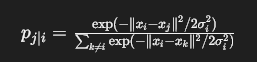
        2. 데이터를 저 차원에 투사했을 떄 다른데이터와의 유사도 구함
             - 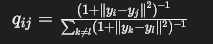
            - 이떄 분포는 정규분포가 아닌 좀더 뾰족하고 끝단이 두꺼운 t-분포를 사용함
        3. 이 저차원 유사도를 고차원 유사도와 비슷하게 최적화함
            - 두 분포 간의 KL 다이버전스를 최소화함
- Occlusion Experiment
    - 이미지의 특정 부분을 잘라내고, 이를 신경망을 통과시킴
    - 원본이미지와 비교해서 점수가 급격하게 변화했다면 해당 부분이 판단에 크게 기여했음을 알수있음

- Saliency Map
    - 각 픽셀에 대한 그래디언트의 절대값 취해 모든 채널에서 최대값을 구해 시각화함
    - 그레디언트의 절대값이 크면 1차적 근사에 영향을 많이 줬음을 알수있음
    - 역전파 과정 중 중간 레이어를 선택해 이에 대해 계산할수도 있음
- Gradient Ascent
    - 특정 뉴런, 채널 레이어의 활성화를 최대화하는 입력 이미지를 찾는 방법임
    - 신경망의 가중치는 고정하고, 입력 이미지를 업데이트함
    - 결론적으로 해당 뉴런이 가장 강하게 반응하는 패턴을 생성하는 방식임
    - 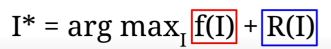
        - 정규화 항 필요함 $R(I)$
    - 과정
        1. 입력 이미지를 초기화시킴(0, 또는 노이즈)
        2. 신경망에 순전파하여 현재 스코어 계산
        3. 목표 활성화값에 대해 입력 이미지에 대한 그래디언트 계산
        4. 계산된 그래디언트로 입력 이미지 업데이트
        - 깔끔한 출력 위해 주기적으로 변화 주기도함
            - 이미지에 가우스 블러
            - 작은 픽셀값 0으로 초기화
            - 작은 픽셀 그래디언트 0으로 초기화
    - 이미지 교란, 적대적 예제
        - 인간에게는 정상적으로 보이지만, 모델이 잘못 분류하도록 설계된 이미지임

- DeepDream
    - 특정 뉴런, 레이어를 증폭시켜 특징을 두드러지게 출력함
    - 선택한 뉴런, 레이어릐 그래디언트를 활성화 함수와 동일하게 만든다.

- Feature Inversion
    - 원본 이미지와 특정 특징 레이어의 값이 일치하는 입력 이미지 생성
        - 자연스러운 이미지 생성하기 위해 정규화 사용함
        - 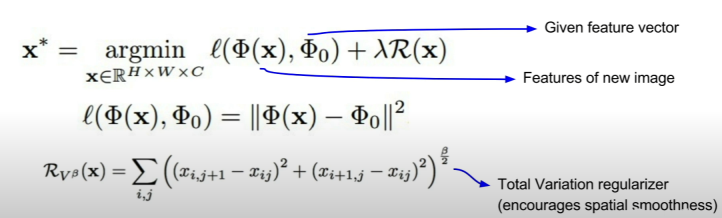


## 텍스쳐 생성
- 작은 패치의 텍스쳐로 비슷한 모양의 큰 텍스쳐를 생성하는 작업임
- 전통적인 방법은 복잡한 무늬에 대해 단조러워지는 경향이 있음
- Gram matrix
    - 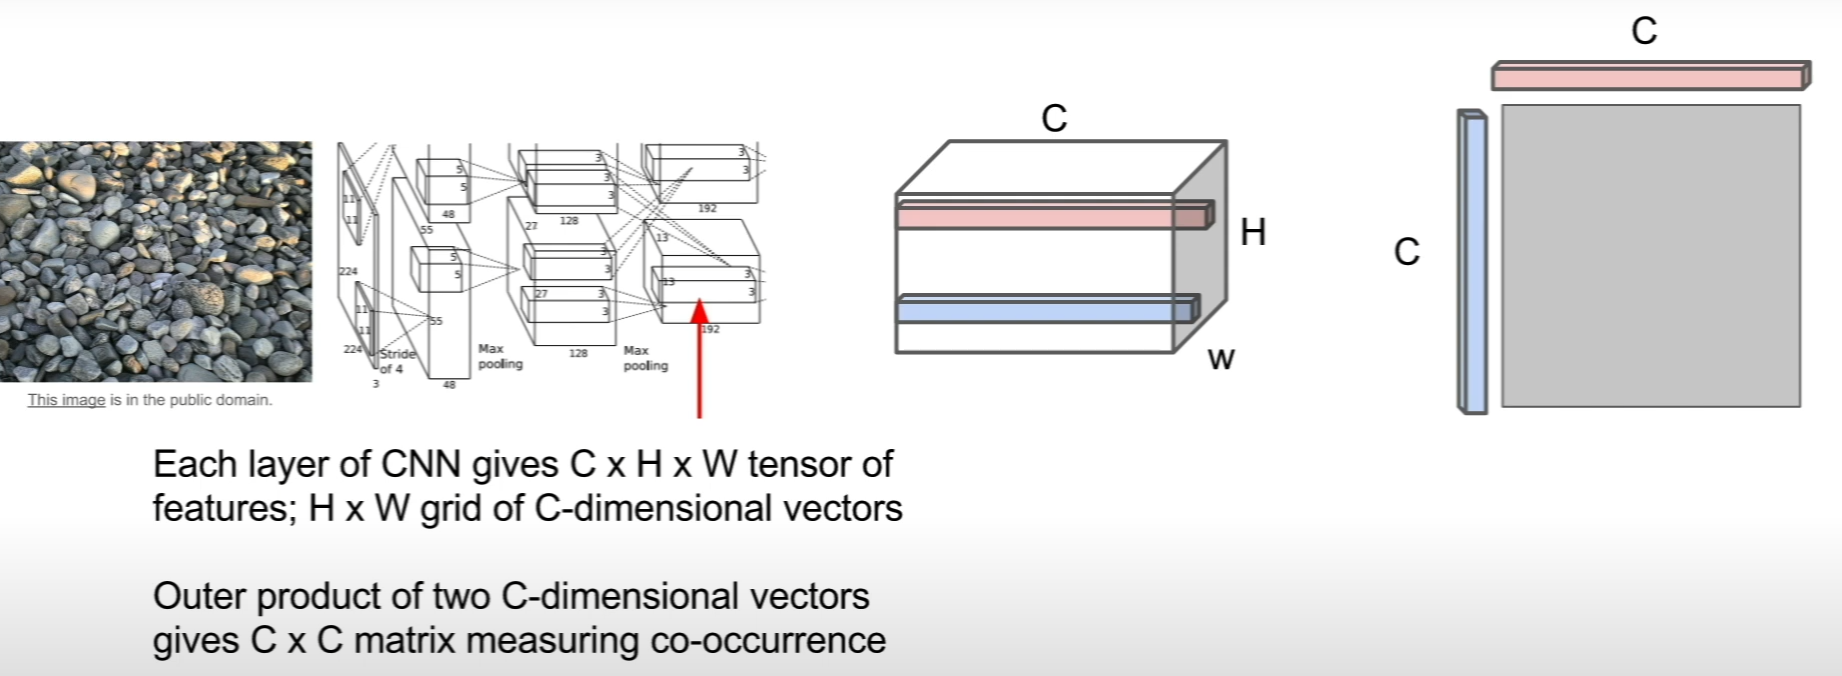
    - 과정
        1. 지정된 텍스쳐를 사전훈련된 신경망에 통과시킴
        2. 연산된 $C-i \times H_i \times W_i$ 크기의 특징 행렬의 Gram matrix 구함
            - 크기 $C_i \times C-i$ 의 행렬 나옴
            - gram matrix는 $G = F × F^T  $ 로 정의함
            - 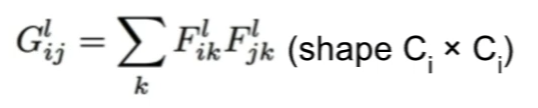
        3. 랜덤한 노이즈를 가진 입력 이미지를 생성함
        4. 이에 대한 신경망의 Gram matrix 를 계산하고, 이를 최소화하도록 경사하강법으로 입력데이터를 변형함

## Neural Style Transfer  
- 텍스처 생성에서 파생됨  
- 3-4-2 참조  
- 과정  
    1. style image, content image 를 입력으로 받음  
    2. 사전훈련된 CNN(주로 VGG-16/19)에 통과시켜 style image 의 gram matrix, content image 의 특징 맵 출력함  
        - Gram matrix는 계산 과정에서 내적 연산으로 인해 공간적 정보가 손실됨  
        - 때문에 텍스처와 같은 스타일 정보만 남길 수 있음  
    3. 두 특징 맵과의 손실함수(총 손실 = α × 콘텐츠 손실 + β × 스타일 손실)를 최소화하는 방향으로 출력 이미지 값을 경사하강법으로 최적화  
    - 하이퍼파라미터 α, β를 통해 style, content 중 어느 쪽에 더 비중을 줄지 정할 수 있음  
- 여러 스타일 이미지를 동시에 사용하여 다중 스타일 트랜스퍼도 가능함  
- 매 이미지마다 수백 번의 반복 최적화가 필요하여 매우 느림  

## Fast Style Transfer  
- 실시간 스타일 트랜스퍼를 위한 개선 방식  
- 이미지를 직접 최적화하는 대신, 손실함수를 최소화하는 피드포워드 네트워크를 사전에 학습시킴  
- 학습 완료 후에는 입력 이미지를 단일 순전파만으로 변환 가능하여 실시간 처리 가능  
- 각 스타일마다 별도의 네트워크를 학습시켜야 하는 제한이 있음